# Check SnAr calculation

In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
from summit.benchmarks import SnarBenchmark
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

from pareto_front import DomainWrapper
from pymoo.model.problem import Problem
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
from pymoo.factory import get_termination

In [16]:
b = SnarBenchmark(noise_level=2.0)
b.domain

Name,Type,Description,Values
tau,"continuous, input",residence time in minutes,"[0.5,2]"
equiv_pldn,"continuous, input",equivalents of pyrrolidine,"[1.0,5]"
conc_dfnb,"continuous, input","concentration of 2,4 dinitrofluorobenenze at reactor inlet (after mixing) in M","[0.1,0.5]"
temperature,"continuous, input",Reactor temperature in degress celsius,"[30,120]"
sty,"continuous, maximize objective",space time yield (kg/m^3/h),"[0,100]"
e_factor,"continuous, minimize objective",E-factor,"[0,10]"


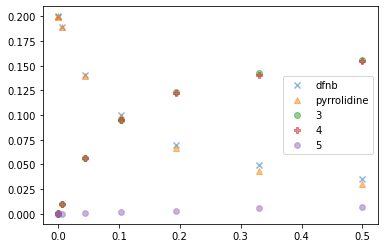

In [27]:
sty, e_factor, res = b._integrate_equations(tau=0.5, equiv_pldn=1.0, conc_dfnb=0.2, temperature=100)
names = ['dfnb', 'pyrrolidine', '3','4', '5']
markers = ['x', '^', 'o', 'P', '8']
fig, ax = plt.subplots(1)
for i in range(5):
    ax.scatter(res.t, res.y[i,:], label=names[i], alpha=0.5, marker=markers[i])
ax.legend()

In [29]:
# Set up problem
exp = SnarBenchmark()
exp.reset()
problem = DomainWrapper(exp)

# Set up optimisation
generations = 100
pop_size = 100
optimizer = NSGA2(pop_size=pop_size)
termination = get_termination("n_gen", generations)

# Run optimisation
res = minimize(
    problem, optimizer, termination, seed=1, verbose=False
)

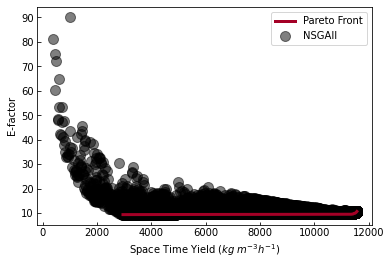

In [33]:
fig, ax = plt.subplots()
exp.pareto_plot(ax=ax)
# ax.set_xlim (2000, 1.2e4)
# ax.set_ylim(9.2, 11)
names = [r'Space Time Yield ($kg \; m^{-3} h^{-1}$)', 'E-factor']
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])
ax.tick_params(direction='in')